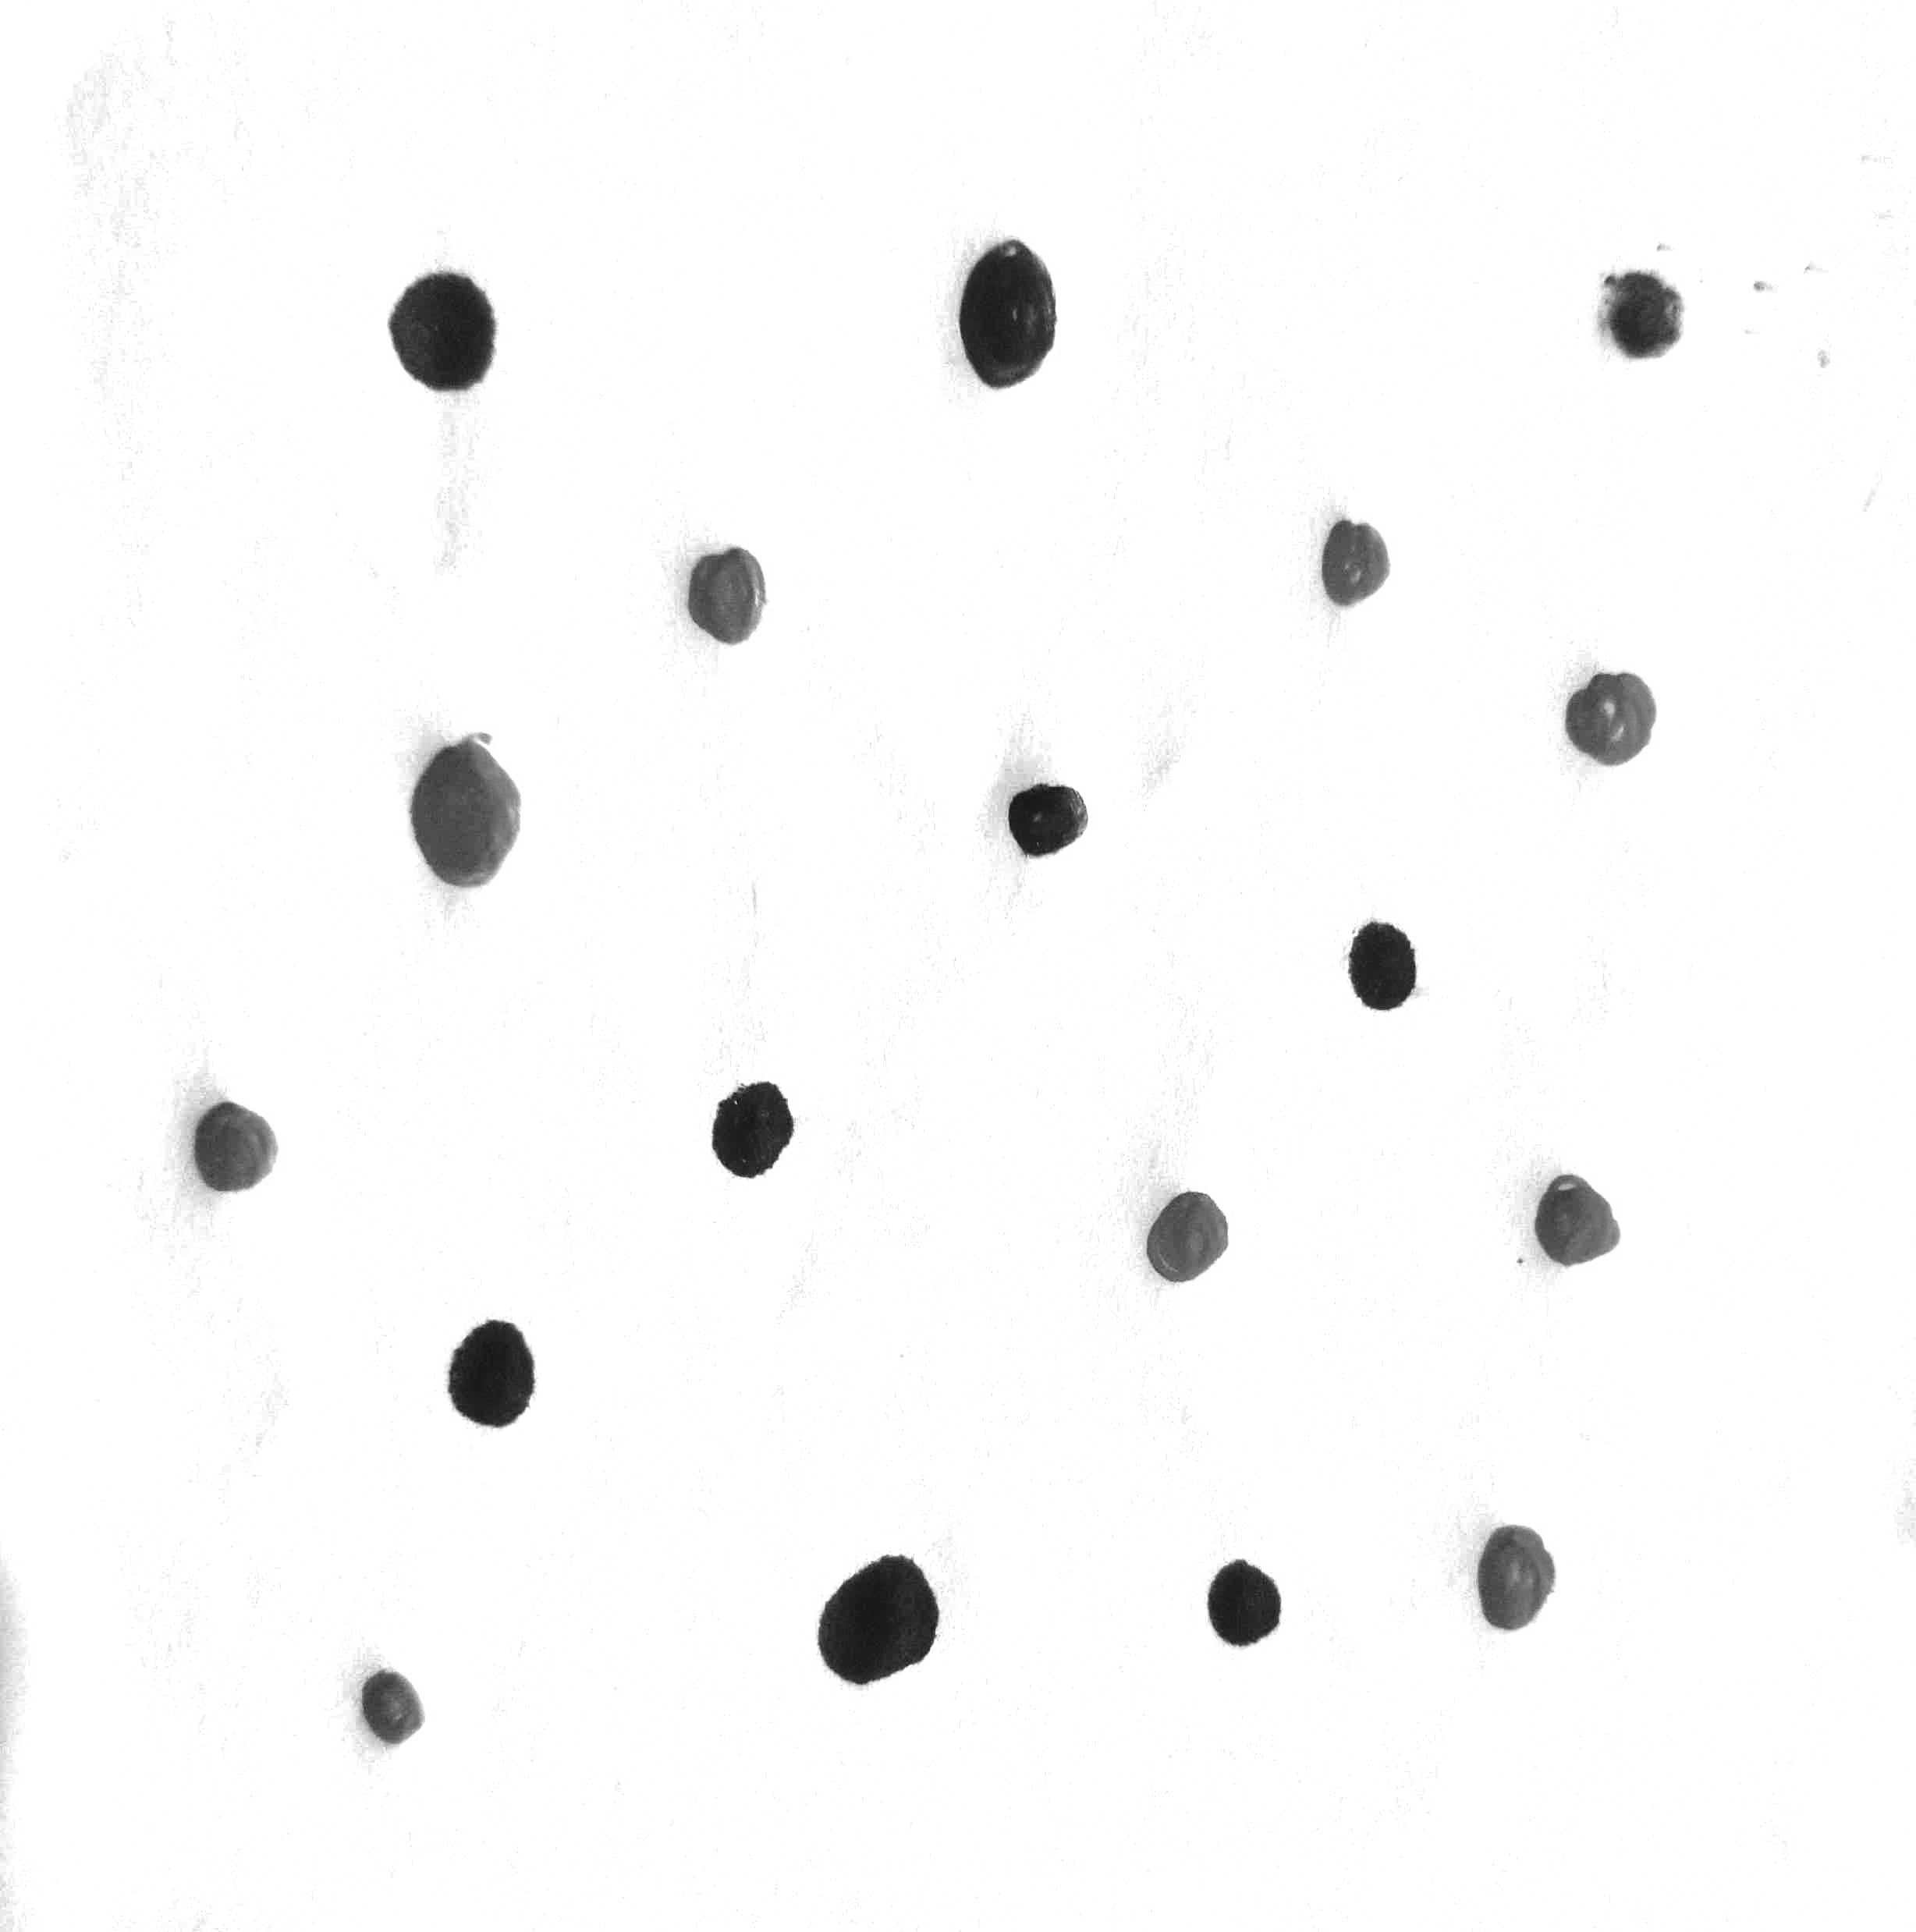

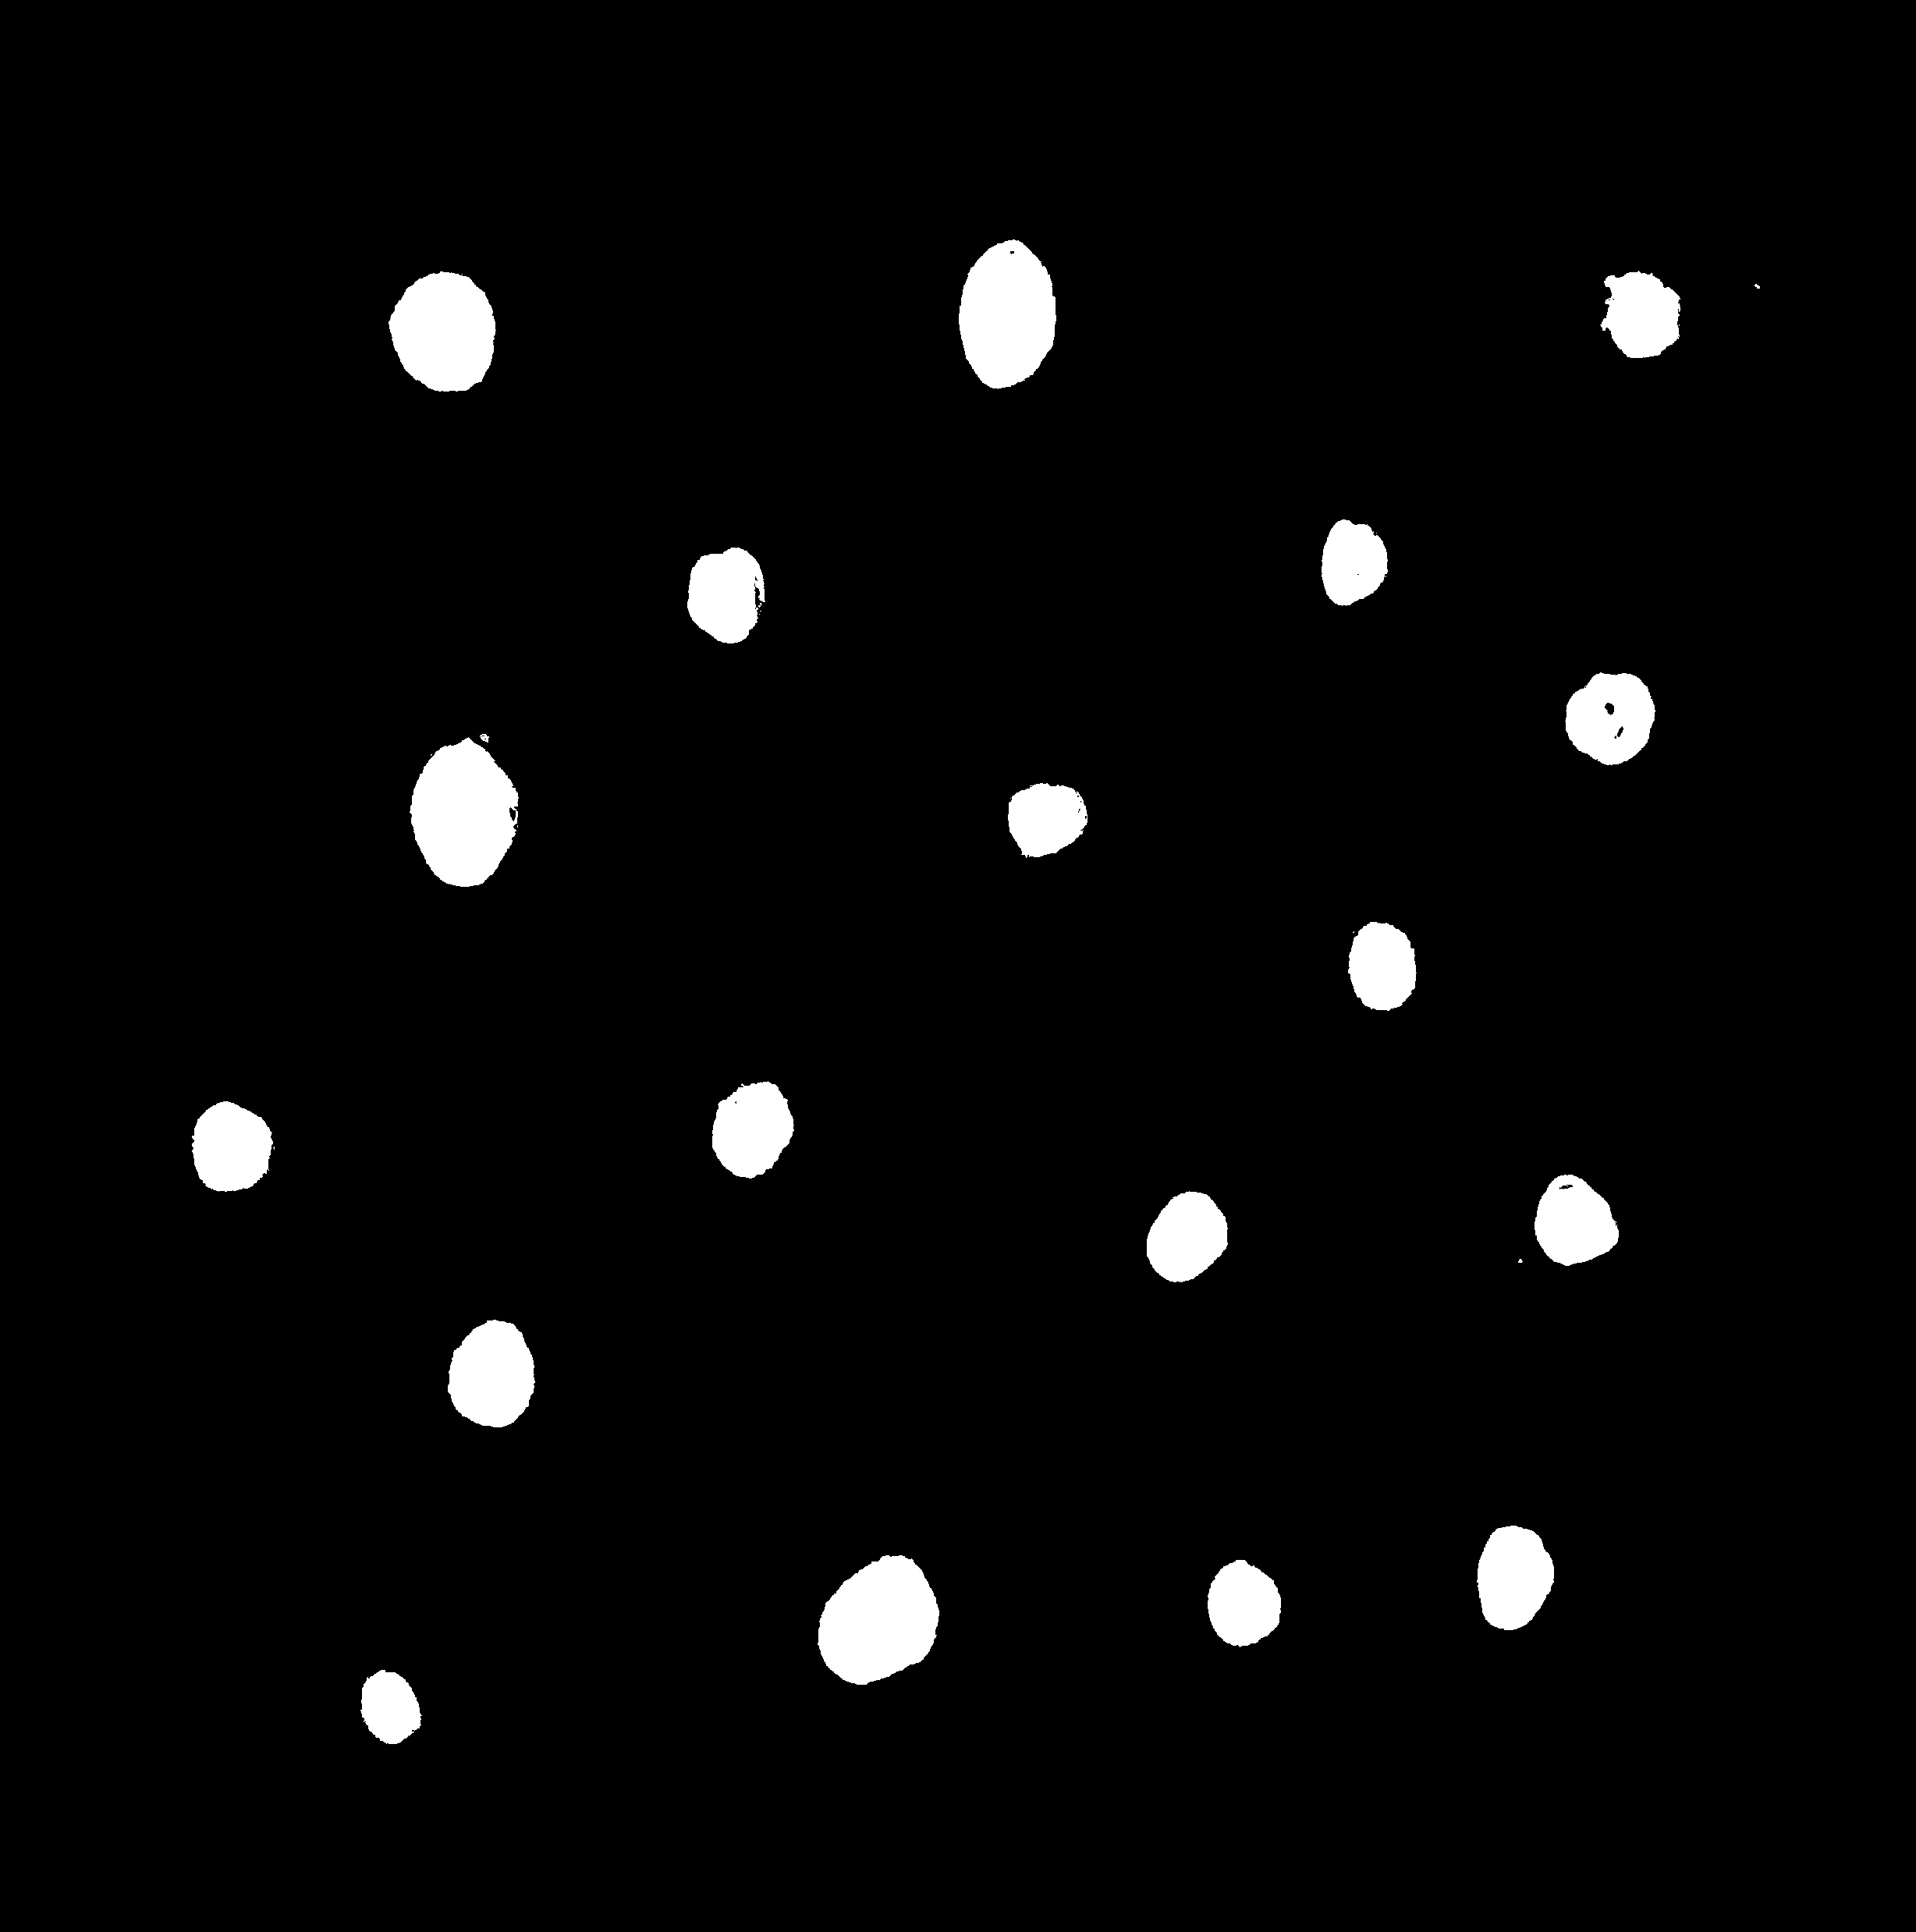

In [1]:
#cs21b2016

import cv2 
import numpy as np 
from IPython.display import Image, display 
from matplotlib import pyplot as plt

path = 'D:/opencv/lab3/new.jpg'

#convert to grayscale
img = cv2.imread(path) 
  
#image grayscale conversion 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#display image


# Plot the image 
def imshow(img, ax=None): 
    if ax is None: 
        ret, encoded = cv2.imencode(".jpg", img) 
        display(Image(encoded)) 
    else: 
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
        ax.axis('off') 

imshow(gray)


ret,bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) 

imshow(bin_img)



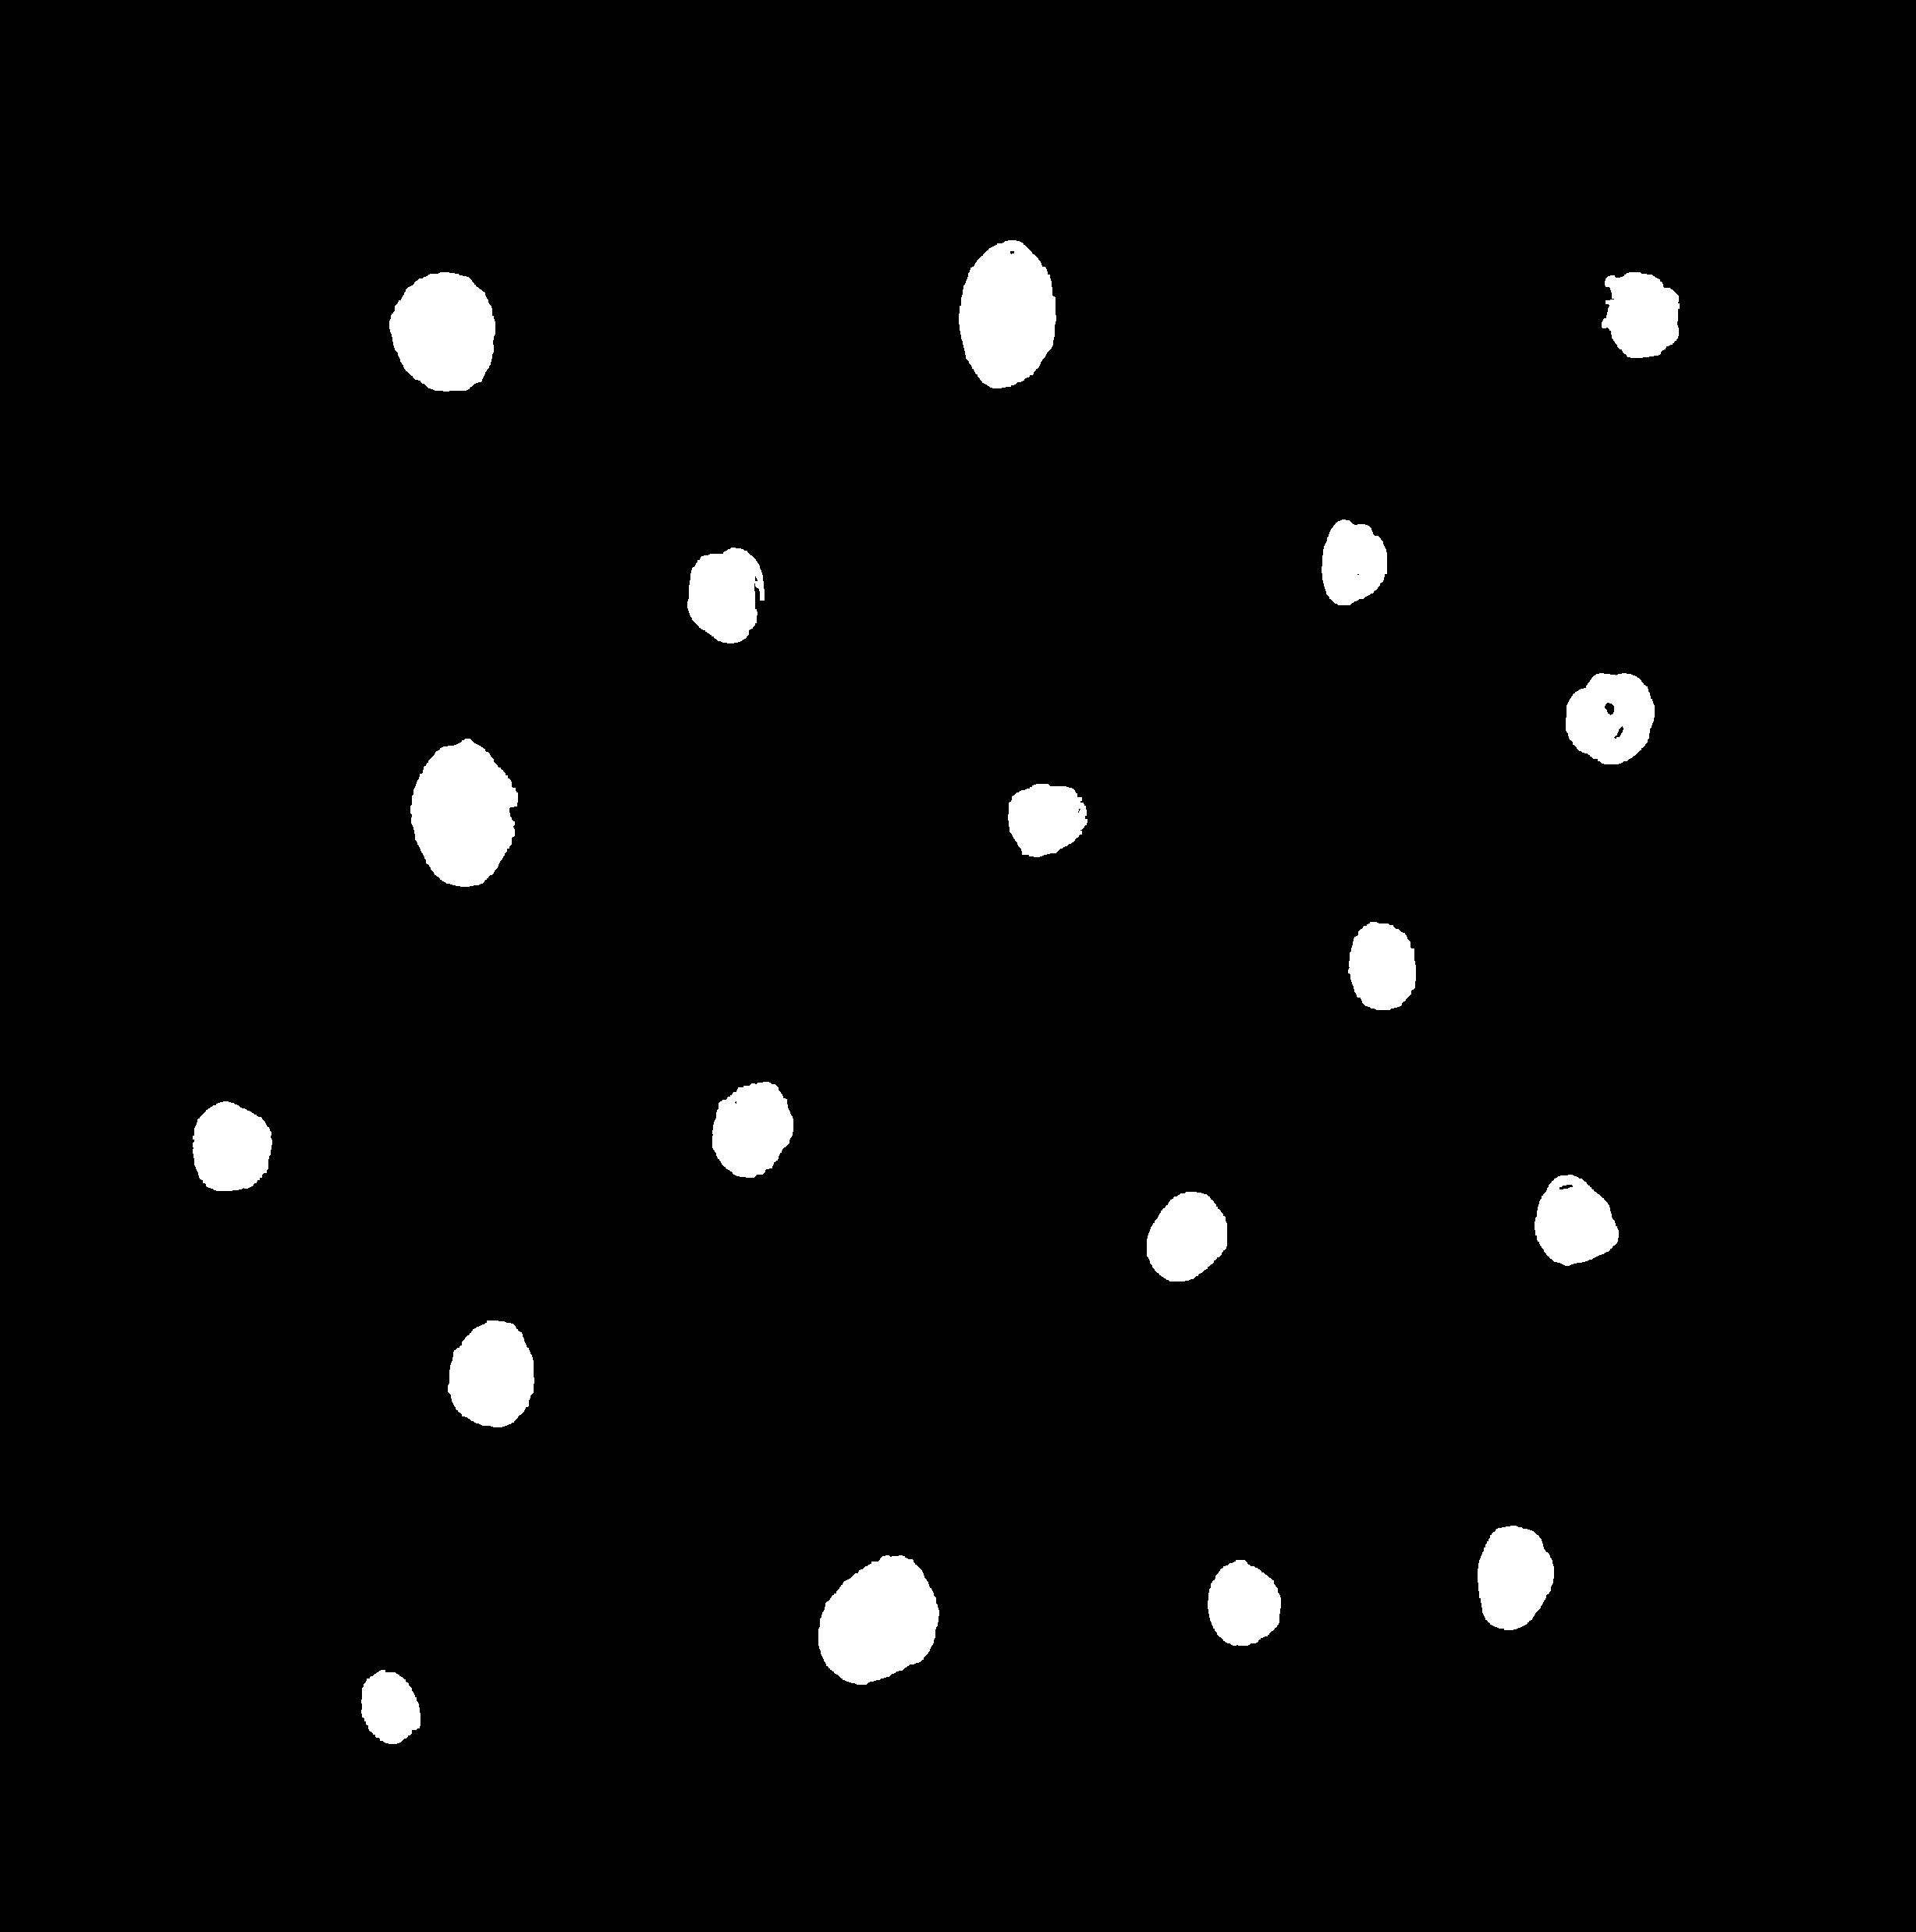

In [2]:
# noise removal 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
bin_img = cv2.morphologyEx(bin_img, 
						cv2.MORPH_OPEN, 
						kernel, 
						iterations=2) 
imshow(bin_img) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


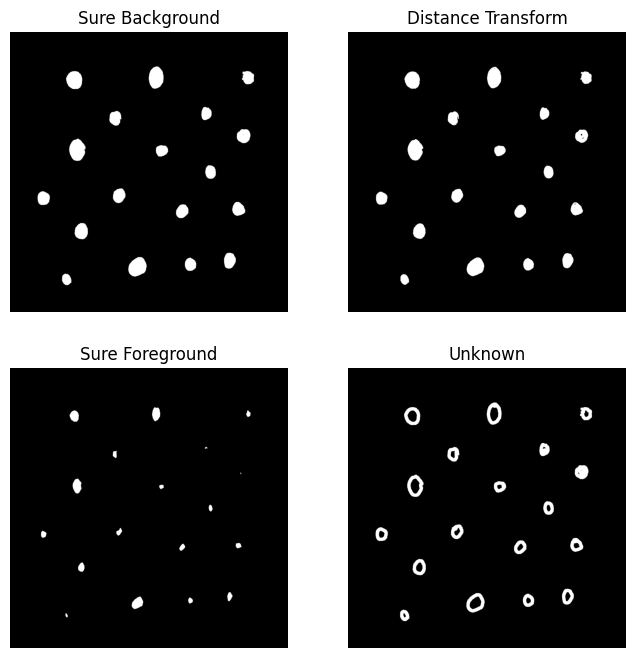

In [4]:
# Create subplots with 1 row and 2 columns 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8)) 
# sure background area 
sure_bg = cv2.dilate(bin_img, kernel, iterations=3) 
imshow(sure_bg, axes[0,0]) 
axes[0, 0].set_title('Sure Background') 

# Distance transform 
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5) 
imshow(dist, axes[0,1]) 
axes[0, 1].set_title('Distance Transform') 

#foreground area 
ret, sure_fg = cv2.threshold(dist, 0.4* dist.max(), 255, cv2.THRESH_BINARY) 
sure_fg = sure_fg.astype(np.uint8) 
imshow(sure_fg, axes[1,0]) 
axes[1, 0].set_title('Sure Foreground') 

# unknown area 
unknown = cv2.subtract(sure_bg, sure_fg) 
imshow(unknown, axes[1,1]) 
axes[1, 1].set_title('Unknown') 

plt.show()



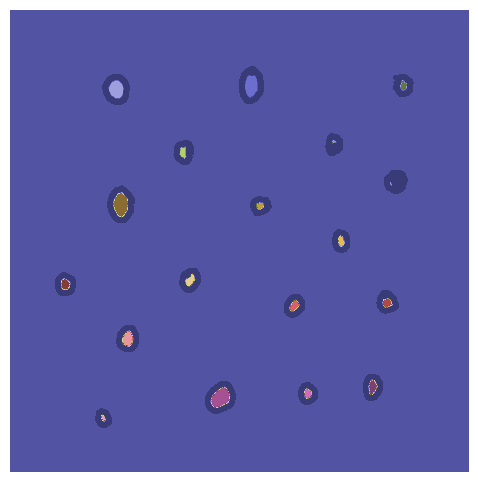

In [6]:
# Marker labelling 

ret, markers = cv2.connectedComponents(sure_fg) 

# Add one to all labels so that background is not 0, but 1 
markers += 1
# mark the region of unknown with zero 
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize=(6, 6)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show()


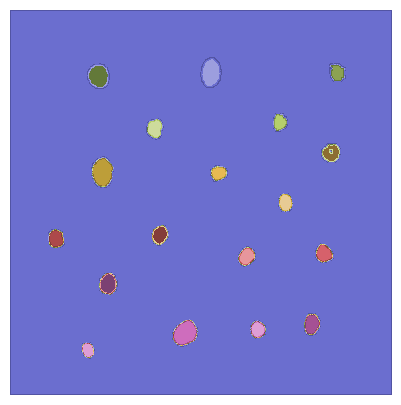

Number of dots: 18


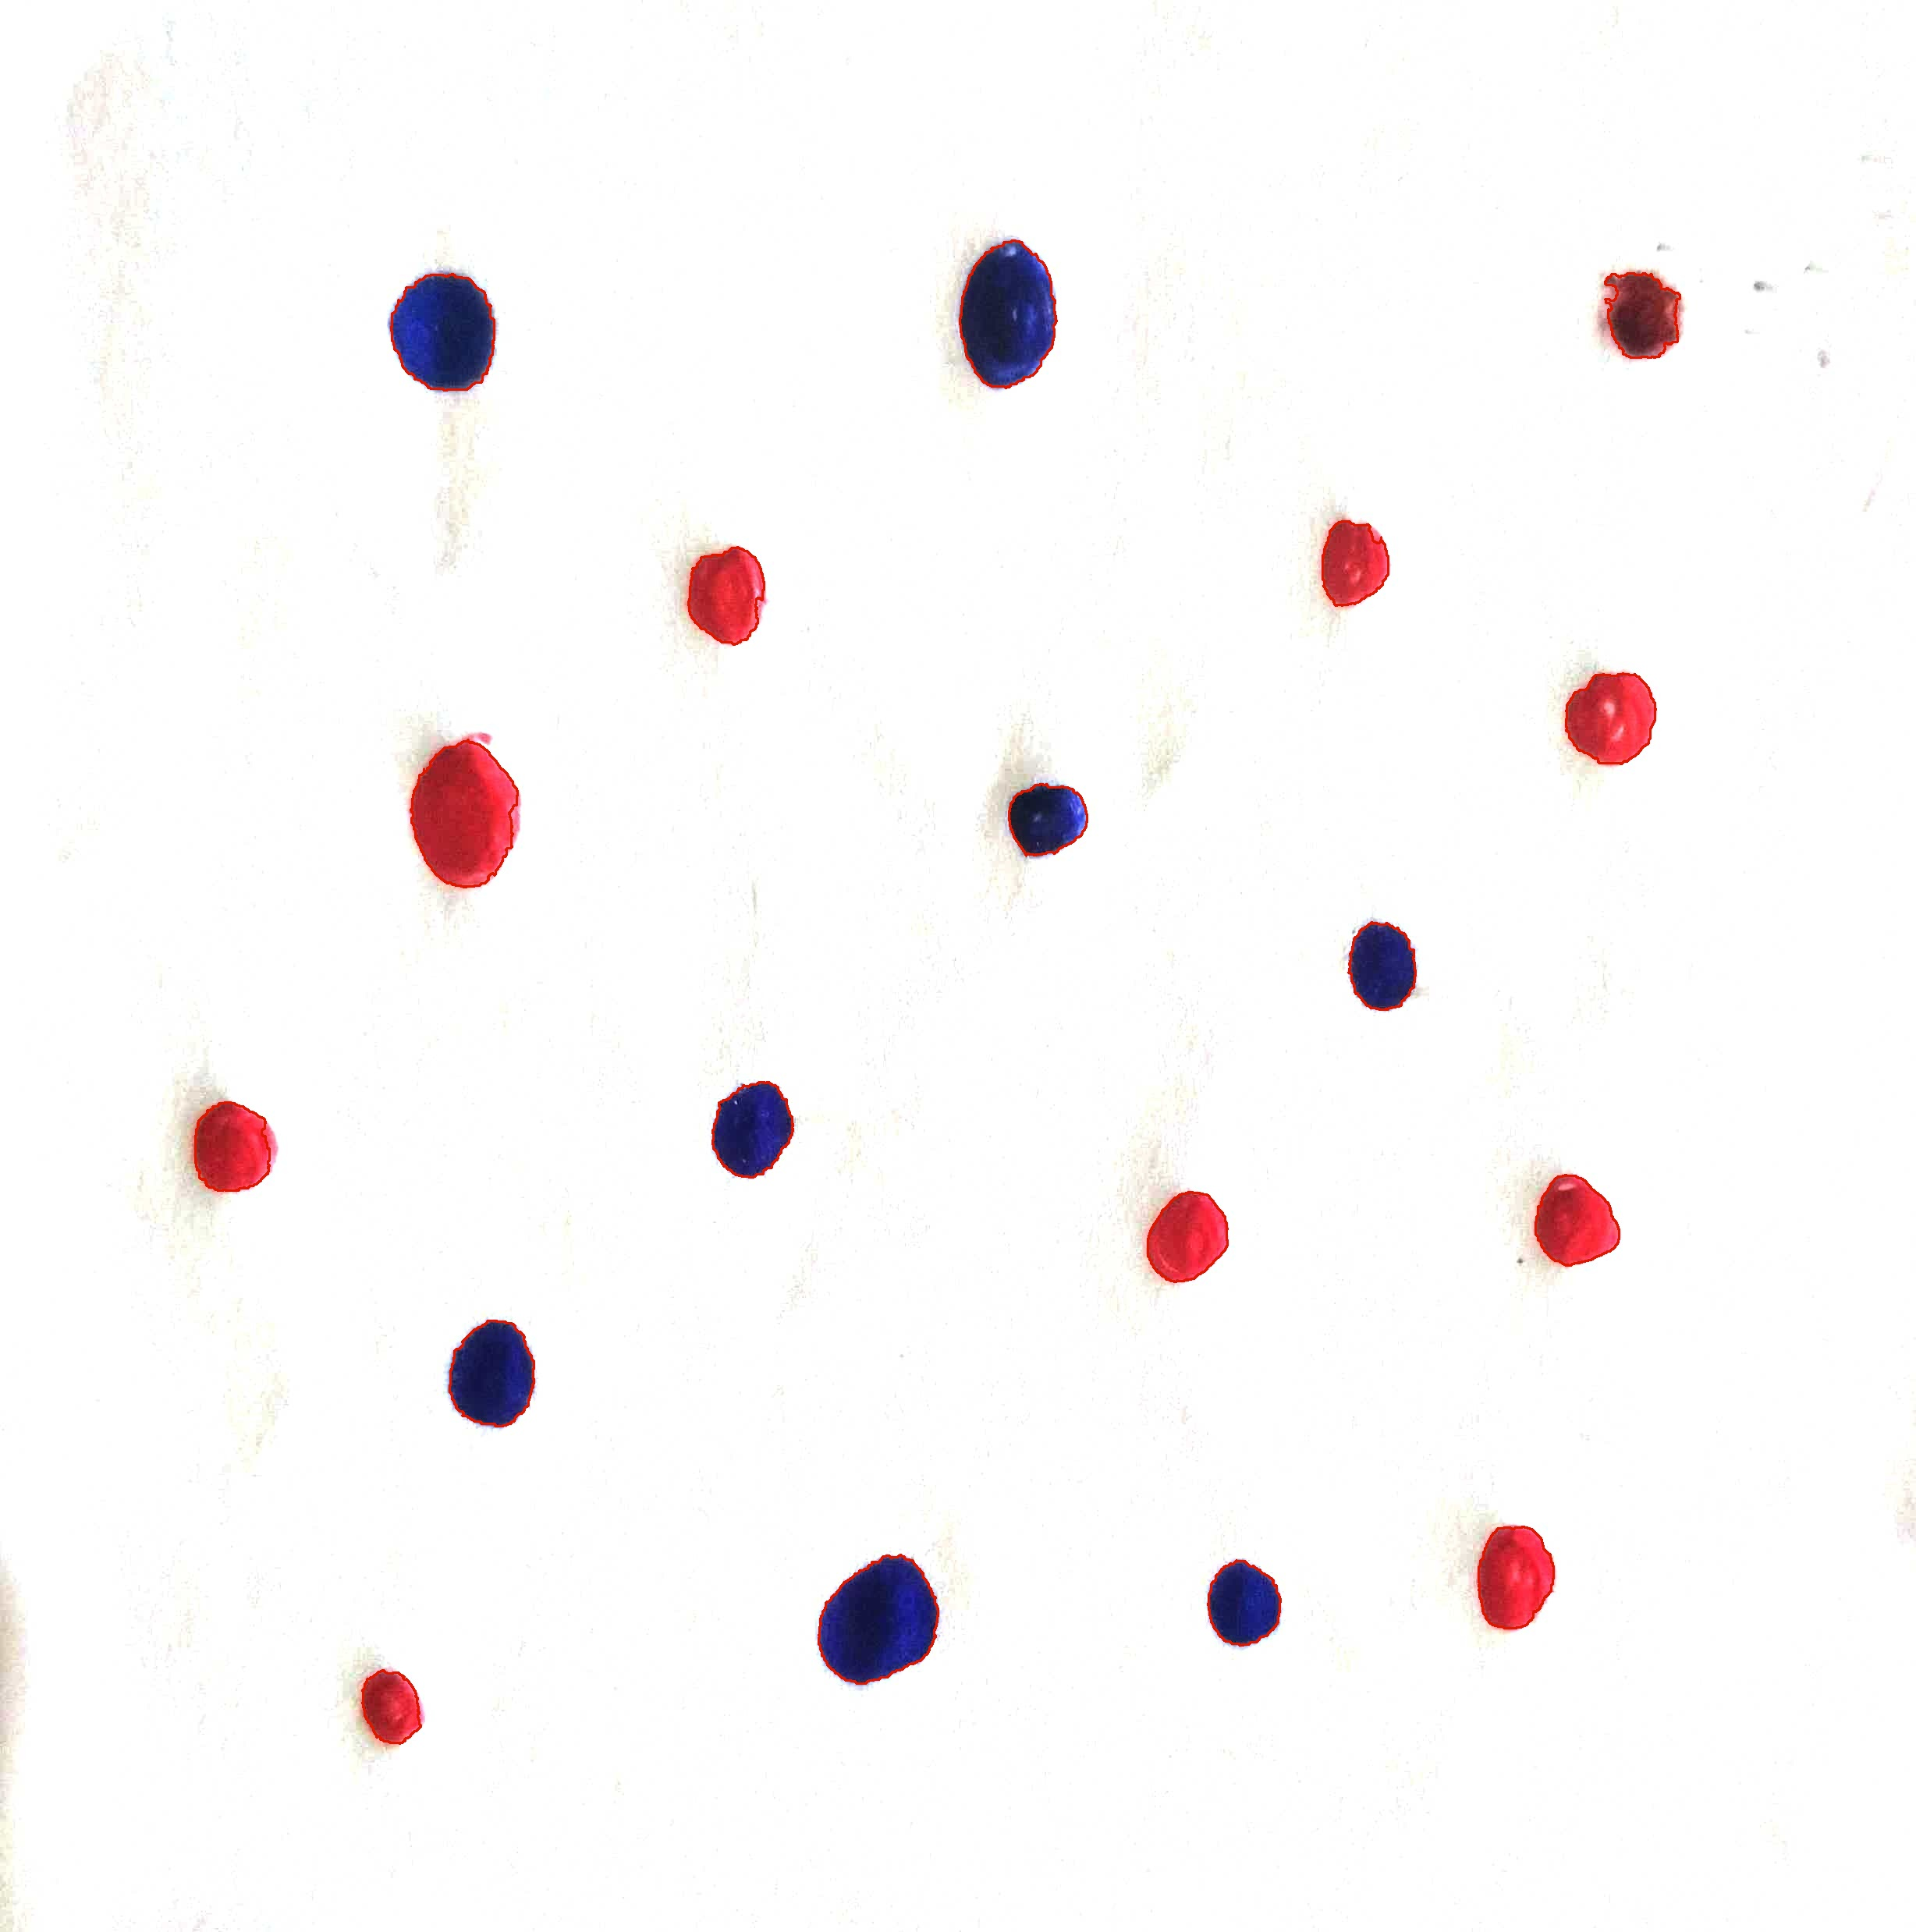

In [7]:

markers = cv2.watershed(img, markers) 

fig, ax = plt.subplots(figsize=(5, 5)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show() 


labels = np.unique(markers) 

coins = [] 
for label in labels[2:]: 


	target = np.where(markers == label, 255, 0).astype(np.uint8) 
	
# Perform contour extraction on the created binary image 
	contours, hierarchy = cv2.findContours( 
		target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
	) 
	coins.append(contours[0]) 

print("Number of dots:", len(coins))
# Draw the outline 
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2) 
imshow(img)
